[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial8.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial8.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 8: Masking with One Condition

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google DeepMind

## ![project pythia](https://projectpythia.org/_static/images/logos/pythia_logo-blue-rtext.svg)

Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851

## ![CMIP.png](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/Art/CMIP.png?raw=true)


# Tutorial Objectives

One useful tool for assessing climate data is masking, which allows you to filter elements of a dataset according to a specific condition and create a "masked array" in which the elements not fulfilling the condition will not be shown. This tool is helpful if you wish to, for example, only look at data greater or less than a certain value, or from a specific temporal or spatial range. For instance, when analyzing a map of global precipitation, we could mask regions that contain a value of mean annual precipitation above or below a specific value or range of values in order to assess wet and dry seasons. 

In this tutorial you will learn how to mask data with one condition, and will apply this to your map of global SST.

# Setup


In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle"
)

In [3]:
# @title Video 1: Climate Feedbacks

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'cx1DGGOBD74'), ('Bilibili', 'BV1pV411T7h5')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [4]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
link_id = "zhb3c"

# Section 1: Masking Data


Using the `xr.where()` or `.where()` method, elements of an xarray Dataset or xarray DataArray that satisfy a given condition or multiple conditions can be replaced/masked. To demonstrate this, we are going to use the `.where()` method on the `tos` DataArray that we've been using in the past few tutorials. 

Let's load the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [5]:
filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
ds

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

## Section 1.1: Using `where` with One Condition

Let's say we want to analyze SST just from the last time in the dataset (2014-09-15). We can isolate this time using `.isel()`:

In [6]:
sample = ds.tos.sel(time='2014-09')
sample

<xarray.DataArray 'tos' (time: 1, lat: 180, lon: 360)>
[64800 values with dtype=float32]
Coordinates:
  * time     (time) object 2014-09-15 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Now that we have our `DataArray` from the desired time period, we can use another function, `.where()` to filter elements according to a condition. The conditional expression in `.where()` can be a `DataArray`, a `Dataset` or a function. Indexing methods on xarray objects generally return a subset of the original data. However, it is sometimes useful to select an object with the same shape as the original data, but with some elements masked. Unlike `.isel()` and `.sel()` that change the shape of the returned results, `.where()` preserves the shape of the original data. It accomplishes this by returning values from the original `DataArray` or `Dataset` if the `condition` is `True`, and fills in values (by default `nan`) wherever the `condition` is `False`. Additional information can be found in the [`.where()` documentation](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html). 

Let's use `.where()` to mask locations with temperature values greater than 0ºC. Note that the condition we supply to `.where()` are the regions we wish to preserve, not those we wish to mask. So if we are interested in masking temperature values that are above 0ºC, we will pass the condition to preserve those that are less than or equal to 0ºC.

In [7]:
# mask temperatures greater than or equal to 0, preserve those that are less than 0
masked_sample = sample.where(sample <= 0.0)
masked_sample

<xarray.DataArray 'tos' (time: 1, lat: 180, lon: 360)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.6132288, -1.6125063, -1.611589 , ..., -1.6145128,
         -1.6141783, -1.6138089],
        [-1.597154 , -1.5969657, -1.5967476, ..., -1.5973103,
         -1.5972834, -1.5972393],
        [-1.5958687, -1.5960269, -1.5961952, ..., -1.5955368,
         -1.5956477, -1.5957516]]], dtype=float32)
Coordinates:
  * time     (time) object 2014-09-15 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Let's plot both our original sample, and the masked sample for September 15th, 2014. Note we are using a different colorbar for the right hand figure, where the range of values is much smaller, and the same colors on the left would not correspond to the same colors on the right.

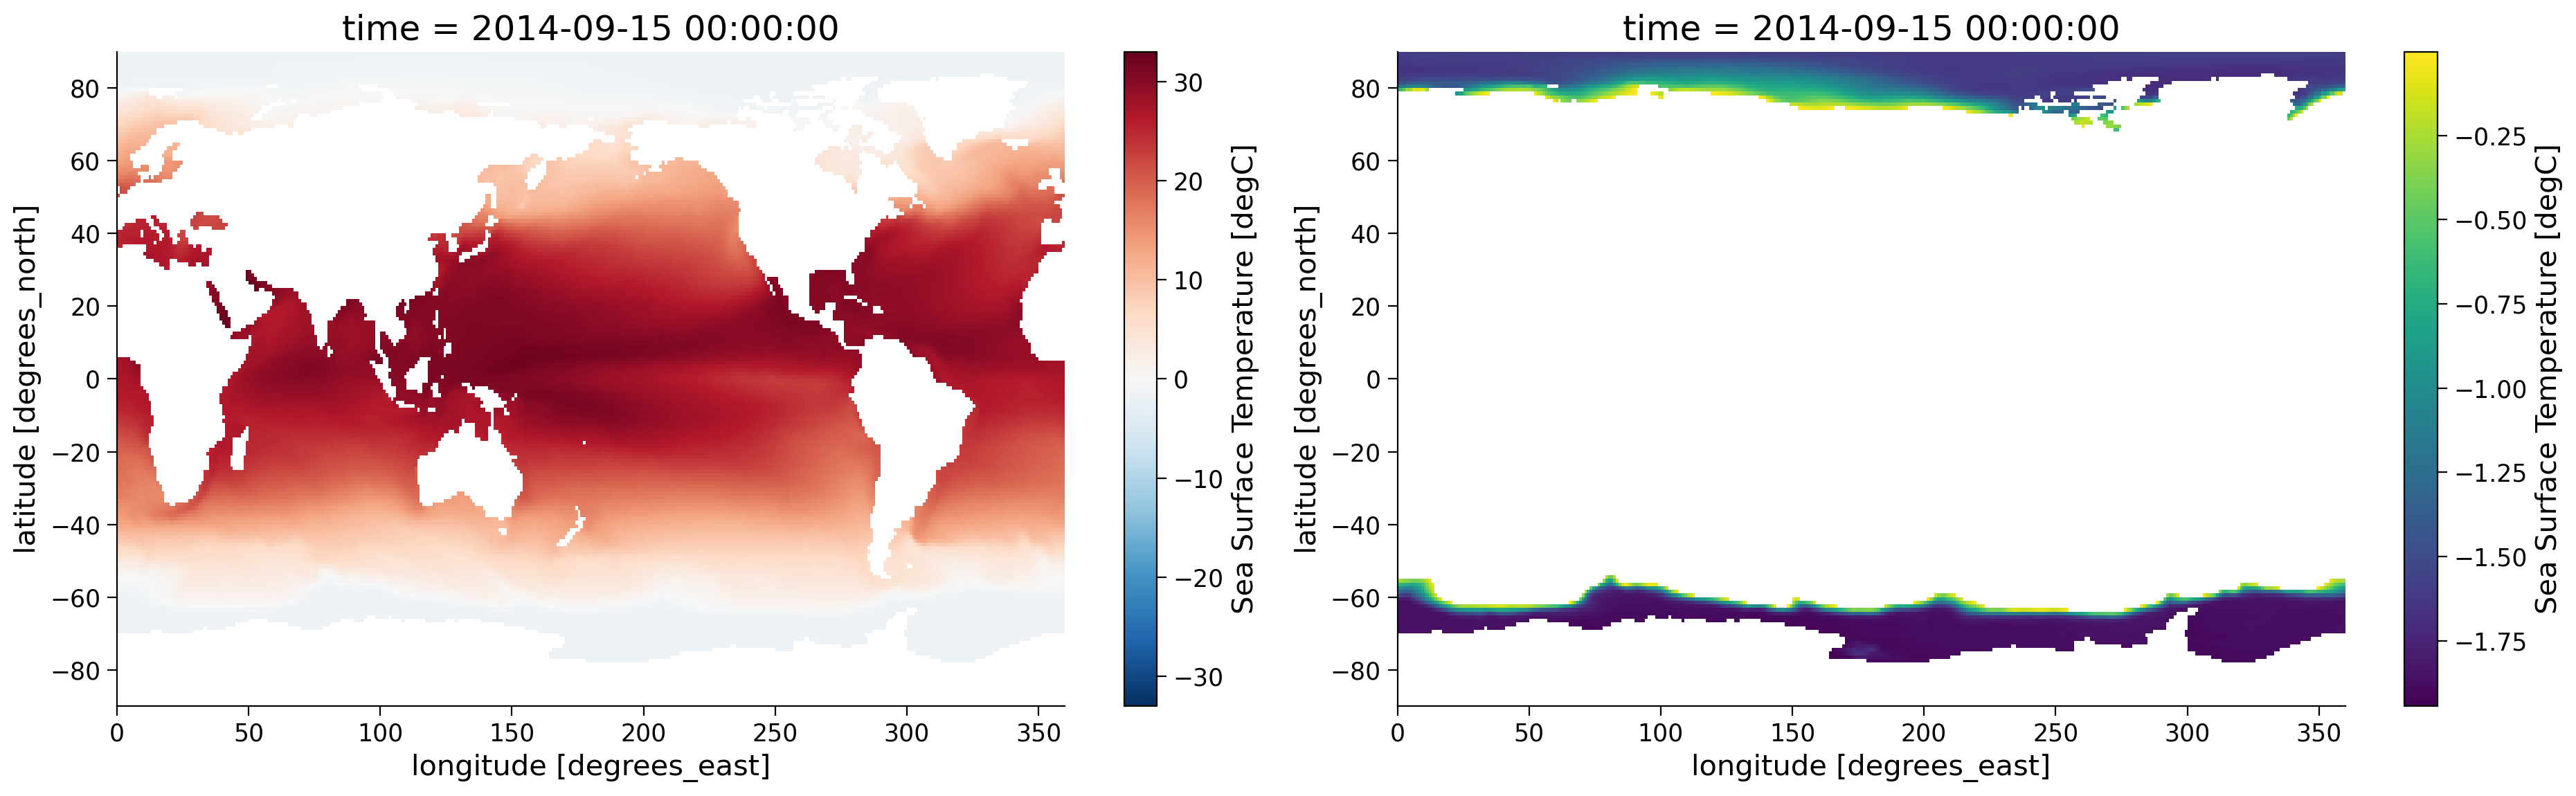

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
sample.plot(ax=axes[0])
masked_sample.plot(ax=axes[1])

Notice how in the figure on the right, only the SST from the areas where SST is below 0ºC is shown and the other areas are white since these are now NaN values. Now let's assess how polar SST has changed over the time period recorded by the original dataset. To do so, we can run the same code but focus on the time 2000-09-15.

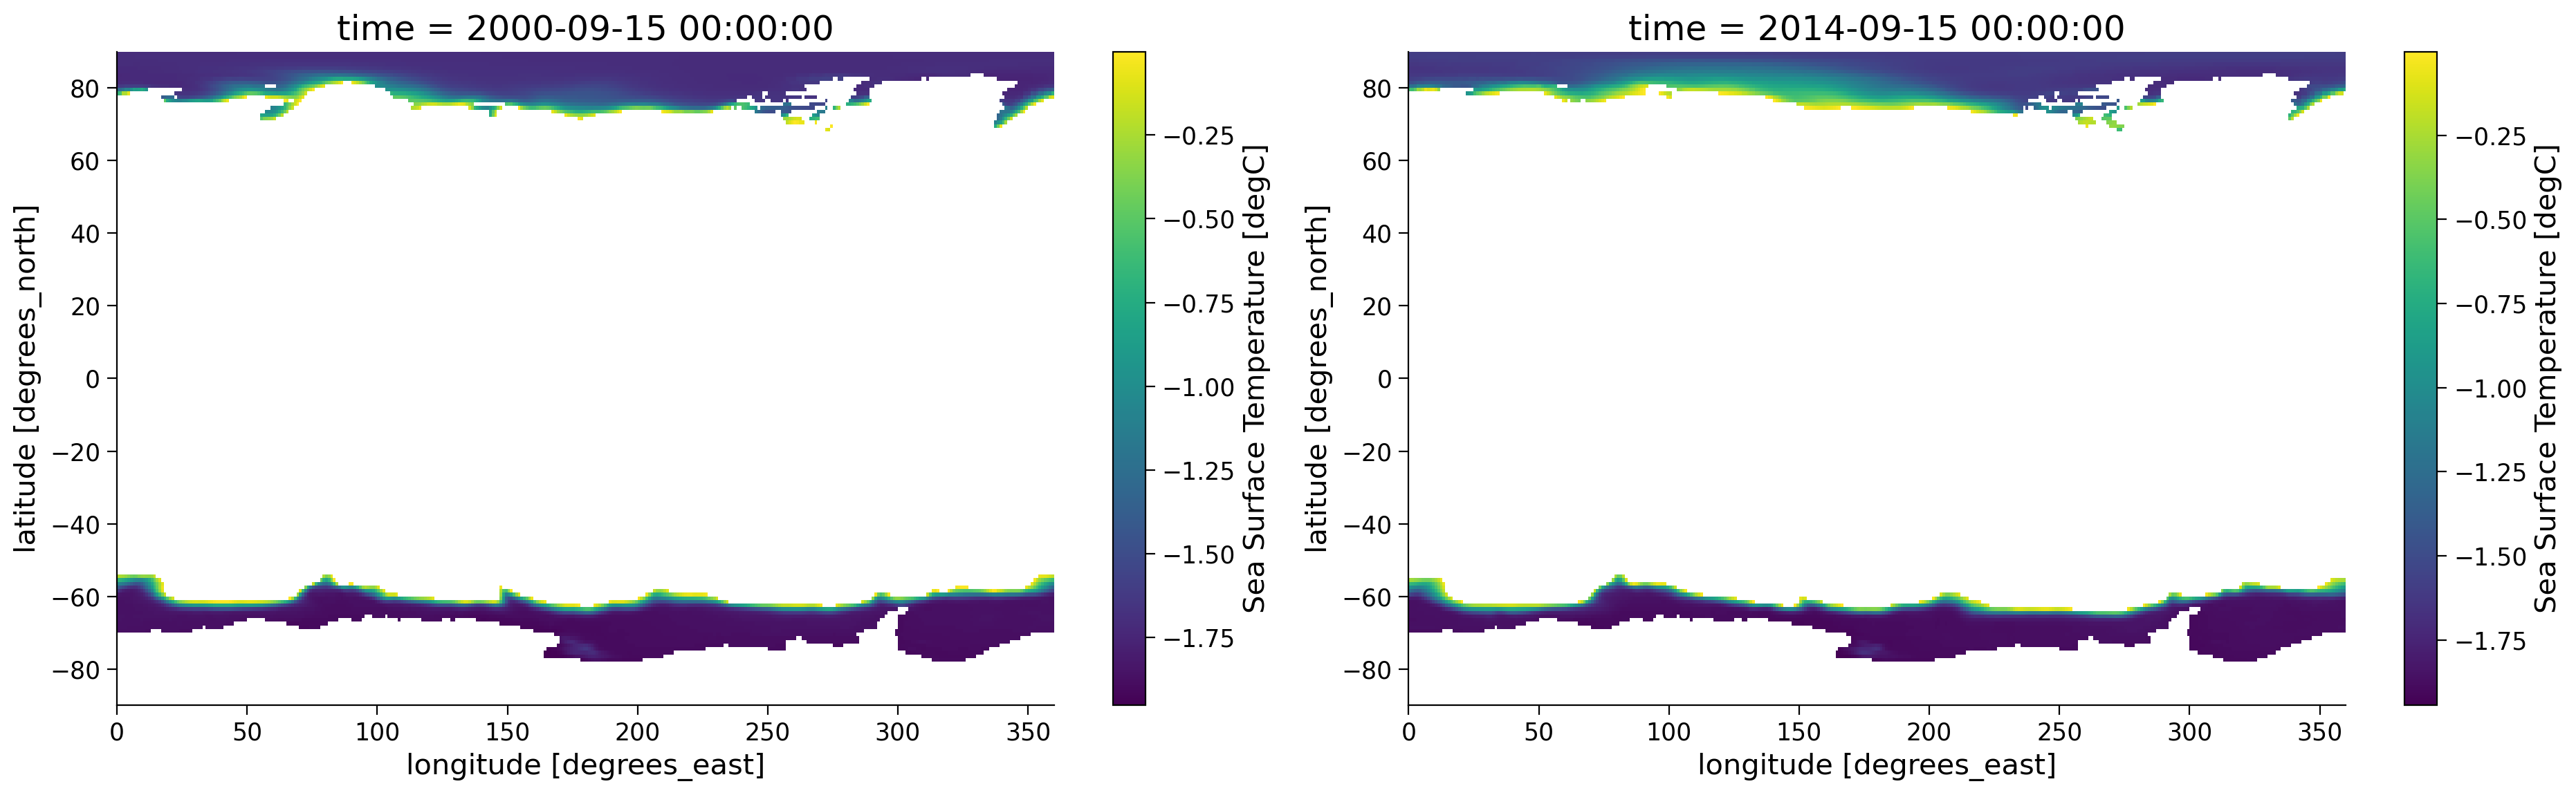

In [9]:
sample_2 = ds.tos.sel(time="2000-09")
masked_sample_2 = sample_2.where(sample_2 < 0.0)
fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
masked_sample_2.plot(ax=axes[0])
masked_sample.plot(ax=axes[1])

### Questions 1.1: Climate Connection

1. What is the purpose of masking in the analysis of climate data?
2. Within the areas that are not masked, how does the distribution of SST compare between these maps?
3. The minimum sea ice extent in the Arctic typically occurs annually in September after spring has brought in more sunlight and warmer temperatures. Considering both plots of September SST above (from 2000 on the left and 2014 on the right), how might changes in the ice-albedo feedback be playing a role in what you observe? Please state any assumptions you would make in your answer.

In [10]:
# to_remove explanation

"""
1. Masking in climate data analysis allows us to focus on specific portions of data that meet particular criteria. By "masking," or hiding values that do not meet these criteria, we can isolate and visualize parts of the data that matter most to our research questions.
2. In the Antarctic, they are roughly the same. In the Artic, there is more area with warmer SST in 2014.
3. The ice-albedo feedback could be amplifying the ocean warming noted in Question 2. The polar regions examined here are the only places where waters can be cold enough to sustain sea ice. In a warming world where sea ice is melting, areas of the ocean that were once covered by reflective ice are replaced by darker water, which absorbs more sunlight, warms and hinders sea-ice growth.

""";

# Summary

In this tutorial, we've explored the application of masking tools in the analysis of Sea Surface Temperature (SST) maps. Through masking, we've been able to focus our attention on areas where the SST is below 0°C. These are the regions where changes in the ice-albedo feedback mechanism are most evident in our present day. This has facilitated a more targeted analysis and clearer understanding of the data.





# Resources

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).